In [16]:
import seaborn
import pandas
import numpy
from matplotlib import pyplot as plot

In [13]:
def read_data(filename):
    raw_data = pandas.read_excel(filename, nrows=400, usecols="E:X")
    tidy_data = pandas.melt(raw_data, var_name="year", value_name="co2")
    tidy_data['year'] =  pandas.to_datetime(tidy_data['year'])
    return tidy_data

def plot_with_percentiles(data, percentiles):
    data_with_percentiles = data.groupby(["year"]).describe(percentiles=percentiles)
    axis = seaborn.lineplot(data=data_with_percentiles["co2"]["50%"])
    axis.fill_between(data_with_percentiles.index,
                      data_with_percentiles[('co2', '5%')],
                      data_with_percentiles[('co2', '95%')],
                      alpha=0.3)

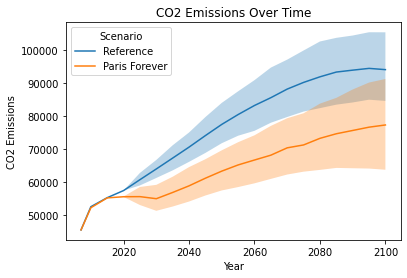

In [26]:
reference_data = read_data("example_Ref Emissions.xlsx")
paris_forever_data = read_data("example_PF Emissions.xlsx")
plot_with_percentiles(reference_data, [.05, .5, .95])
plot_with_percentiles(paris_forever_data, [.05, .5, .95])
plot.title("CO2 Emissions Over Time")
plot.xlabel("Year")
plot.ylabel("CO2 Emissions")
plot.legend(title="Scenario", loc='upper left', labels=['Reference', 'Paris Forever'])
plot.savefig("test.png", dpi=300)